# Programming for Data Science Series (Lab Session 20)
## Scraping Wikipedia
### Objectives
* To understand how to scrape data from wikipedia
* To be able to apply everything we have learned such as web scraping, data manipulation techniques, data visualization

### Associated Tutorial for this Lab session is shown below:

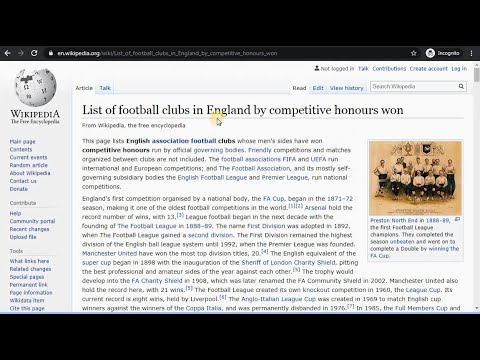

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('93sI1GU0dLY', width=800, height=450)

In [1]:
import requests 
from bs4 import BeautifulSoup

page = requests.get('https://en.wikipedia.org/wiki/List_of_football_clubs_in_England_by_competitive_honours_won')
soup = BeautifulSoup(page.content, 'html.parser')
#print(soup)

One of the essential skills in data science project is the ability to handle the data. In this project, we will breakdown scrape data into three parts:
* Column header
* Row header
* Row data (also known as data table)
<br/>Once we got all of the above data, then we can combine them into a single data frame using pandas

In [2]:
import pandas as pd
table = soup.find('table').tbody
rows = table.find_all('tr')
cols = [val.get_text() for val in rows[1].find_all('th')]
cols

['Club\n',
 'Cups\n',
 'Super Cups\n',
 'Total\n',
 'League\n',
 'Cups\n',
 'Super Cups\n',
 'Total\n',
 'League\n',
 'Cups\n',
 'Super Cups\n',
 'Total\n']

In [3]:
import pandas as pd
table = soup.find('table').tbody
rows = table.find_all('tr')
cols = [val.text.replace('\n', '') for val in rows[1].find_all('th')]
cols

['Club',
 'Cups',
 'Super Cups',
 'Total',
 'League',
 'Cups',
 'Super Cups',
 'Total',
 'League',
 'Cups',
 'Super Cups',
 'Total']

In [4]:
#rows
row_header = []
for i in range(2, len(rows)):
    row_header.append([val.text.replace('\n', '') for val in rows[i].find_all('th')])
row_header

[['Manchester United'],
 ['Liverpool'],
 ['Arsenal'],
 ['Chelsea'],
 ['Manchester City'],
 ['Tottenham Hotspur'],
 ['Aston Villa'],
 ['Everton'],
 ['Newcastle United'],
 ['Nottingham Forest'],
 ['Wolverhampton Wanderers'],
 ['Blackburn Rovers'],
 ['Sunderland'],
 ['Sheffield Wednesday'],
 ['Leeds United'],
 ['West Bromwich Albion'],
 ['West Ham United'],
 ['Sheffield United'],
 ['Huddersfield Town'],
 ['Portsmouth'],
 ['Burnley'],
 ['Leicester City'],
 ['Wanderers'],
 ['Bolton Wanderers'],
 ['Preston North End'],
 ['Derby County'],
 ['Ipswich Town'],
 ['Corinthian'],
 ['Birmingham City'],
 ['Bury'],
 ['Norwich City'],
 ['Old Etonians'],
 ['Cardiff City[e]'],
 ['Swindon Town'],
 ['Wigan Athletic'],
 ['Swansea City[f]'],
 ['Middlesbrough'],
 ['Crystal Palace'],
 ['Luton Town'],
 ['Reading'],
 ['Wimbledon'],
 ['Coventry City'],
 ['Oxford United'],
 ['Southampton'],
 ['Stoke City'],
 ['Queens Park Rangers'],
 ['Blackpool'],
 ['Charlton Athletic'],
 ['Barnsley'],
 ['Bradford City'],
 ['Nott

In [5]:
score = []
for i in range(2, len(rows)):
    score.append([val.text.replace('\n', '') for val in rows[i].find_all('td')])
score

[['6', '2', '8', '20', '17', '21', '58', '20', '23', '23', '66'],
 ['10', '4', '14', '18', '16[a]', '16', '50', '18', '26', '20', '64'],
 ['2', '—', '2', '13', '16', '15', '44', '13', '18', '15', '46'],
 ['5', '1', '6', '6', '15', '4', '25', '6', '20', '5', '31'],
 ['1', '—', '1', '6', '13', '6', '25', '6', '14', '6', '26'],
 ['3', '—', '3', '2', '12', '9[b]', '23', '2', '15', '9', '26'],
 ['2', '1', '3', '7', '12', '3[c]', '22', '7', '14', '4', '25'],
 ['1', '—', '1', '9', '5', '9', '23', '9', '6', '9', '24'],
 ['2', '—', '2', '4', '6', '2', '12', '4', '8', '2', '14'],
 ['2', '1', '3', '1', '8', '1', '10', '1', '10', '2', '13'],
 ['—', '—', '—', '3', '6', '4', '13', '3', '6', '4', '13'],
 ['—', '—', '—', '3', '8', '1', '12', '3', '8', '1', '12'],
 ['—', '—', '—', '6', '2', '2[d]', '10', '6', '2', '2', '10'],
 ['—', '—', '—', '4', '4', '2', '10', '4', '4', '2', '10'],
 ['2', '—', '2', '3', '2', '2', '7', '3', '4', '2', '9'],
 ['—', '—', '—', '1', '6', '2', '9', '1', '6', '2', '9'],
 ['

In [6]:
data = []
for i in range(0, len(score)):
    data.append(row_header[i] + score[i])
#data

In [7]:
df = pd.DataFrame(columns=cols)
for d in data:
    df.loc[len(df)] = d
df.head()

,Club,Cups,Super Cups,Total,League,Cups,Super Cups,Total,League,Cups,Super Cups,Total
0,Manchester United,6,2,8,20,17,21,58,20,23,23,66
1,Liverpool,10,4,14,18,16[a],16,50,18,26,20,64
2,Arsenal,2,—,2,13,16,15,44,13,18,15,46
3,Chelsea,5,1,6,6,15,4,25,6,20,5,31
4,Manchester City,1,—,1,6,13,6,25,6,14,6,26


<b>Important Note: This is not the only way we can come up with pandas data frame, there are many other way to achieve it, however, our purpose of study is to breakdown big tasks into smaller tasks, i.e. to breakdown our scraped data into three parts and join them together</b>

In [8]:
top = df.head(10)
top

,Club,Cups,Super Cups,Total,League,Cups,Super Cups,Total,League,Cups,Super Cups,Total
0,Manchester United,6,2,8,20,17,21,58,20,23,23,66
1,Liverpool,10,4,14,18,16[a],16,50,18,26,20,64
2,Arsenal,2,—,2,13,16,15,44,13,18,15,46
3,Chelsea,5,1,6,6,15,4,25,6,20,5,31
4,Manchester City,1,—,1,6,13,6,25,6,14,6,26
5,Tottenham Hotspur,3,—,3,2,12,9[b],23,2,15,9,26
6,Aston Villa,2,1,3,7,12,3[c],22,7,14,4,25
7,Everton,1,—,1,9,5,9,23,9,6,9,24
8,Newcastle United,2,—,2,4,6,2,12,4,8,2,14
9,Nottingham Forest,2,1,3,1,8,1,10,1,10,2,13


In [30]:
bdf = top.iloc[:, [0,-1]]
bdf.Total

0    66
1    64
2    46
3    31
4    26
5    26
6    25
7    24
8    14
9    13
Name: Total, dtype: object

<Container object of 10 artists>

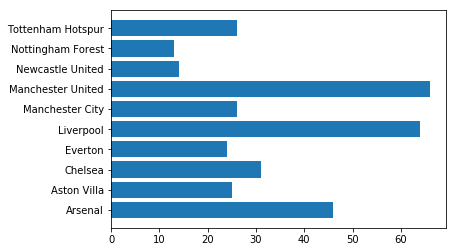

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.barh(bdf.Club, [int(x) for x in bdf.Total])